# Seattle AirBnB Dataset

# This notebook is a project from the udacity NSND for creating a blog post and Github repository of Seattle AirBnB  Dataset


# Business understanding Questions:
 1. What are the top 10 airbnb names with highest reviews?
 2. What is the top 5 listing id that got the highest number of reviews?
 3. What is the months that airbnb homes rents most?
 4. what is the most years and months that hosts joined at?

# Data understanding and preparation

In [66]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [67]:
# read csv file
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

In [68]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [69]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [70]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [71]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [72]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [73]:
reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [74]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [75]:
reviews.head(50)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [76]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [77]:
# number of null in calendar
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [78]:
# number of null in listings
listings.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [79]:
# number of null in reviews
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

# 1) calendar

In [80]:
# date type is object is must be convorted to datetime
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [81]:
# replace function for $ and , because the intended column must be float and it cant be with $ and ,
def replaceDolarComma(dataset, column):
    '''
    input:  
        dataset: the specific dataset that has the column with $ and ,
        column: the column name that has values of $ and ,
    output:
        dataset[column]: a column in a specific dataset that has $ and , replaced (cleaned) 
    '''
    dataset[column] = dataset[column].str.replace('$','').str.replace(',','')

In [82]:
# replace $ and ,
replaceDolarComma(calendar, 'price')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.00
1,241032,2016-01-05,t,85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [83]:
# function for convorting null to 0 or none for the dataset to be more obvious and readable 
def convortToZeroOrNone(dataset, column, variable):
    '''
    input:  
        dataset: the specific dataset that has columns values with null
        column: the column name that has values null
        variable: which value (zero or none) to replace the null with 
    output:
        dataset[column]: a column in a specific dataset that has null replaced with either zero or none 
    '''
    dataset[column] = dataset[column].fillna(variable)

convortToZeroOrNone(calendar,'price',0)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.00
1,241032,2016-01-05,t,85.00
2,241032,2016-01-06,f,0
3,241032,2016-01-07,f,0
4,241032,2016-01-08,f,0


In [84]:
# function for convorting column to float such as price which is a number 
def convortToFloat(dataset, column):
    '''
    input:  
        dataset: the specific dataset that has columns values with data type not float 
        column: the column name that has not float type
    output:
        dataset[column]: a column in a specific dataset that has convorted float type values 
    '''
    dataset[column] = pd.to_numeric(dataset[column])
convortToFloat(calendar,'price')
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

# 2) reviews

In [85]:
# function for convorting column of date type to datetime 
def convortToDate(dataset, column):
    '''
    input:  
        dataset: the specific dataset that has columns values with data type not datetime 
        column: the column name that has not datetime type
    output:
        dataset[column]: a column in a specific dataset that has convorted datetime type values 
    '''
    dataset[column] = pd.to_datetime(dataset[column])

convortToDate(reviews, 'date')
reviews.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

In [86]:
# convort null to none
convortToZeroOrNone(reviews,'comments','none')

In [87]:
reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

# 3) listings

In [88]:
# show all object type in listings
listingsObject=list(listings.select_dtypes(include=['object']))

In [89]:
len(listingsObject)

62

In [90]:
# drop all columns with only one value because it is redundant
for i in listingsObject:
    rowsCount = listings[i].value_counts().count()
    if rowsCount == 1:
        listings.drop(i, axis = 1, inplace=True)
        print('drop ',i)

drop  last_scraped
drop  experiences_offered
drop  market
drop  country_code
drop  country
drop  has_availability
drop  calendar_last_scraped
drop  requires_license
drop  jurisdiction_names


In [91]:
list(listings.select_dtypes(include=['object']))

['listing_url',
 'name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'smart_location',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'first_review',
 'last_review',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [92]:
listings.head()

,id,listing_url,scrape_id,name,summary,space,description,neighborhood_overview,notes,transit,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,...,10.0,9.0,10.0,NaN,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,10.0,10.0,10.0,NaN,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,10.0,10.0,10.0,NaN,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,10.0,9.0,9.0,NaN,f,strict,f,f,1,0.89


In [93]:
# drop also scrape_id
listings.drop('scrape_id', axis = 1, inplace=True)

In [94]:
# drop the outlier with more than 20% threshold because the previous display of the dataset 
#shows this percentage is Approximately the number of missing values 
removeOutlier = []
for i in list(listings):
    if ((listings[i].isnull().sum() / len(listings[i])) > 0.2):
           removeOutlier.append(i)
        
removeOutlier


['neighborhood_overview',
 'notes',
 'transit',
 'host_about',
 'host_acceptance_rate',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'license']

In [95]:
listings.drop(removeOutlier, axis=1, inplace=True)

In [96]:
# all float type with null wil be convorted to 0
listingsCFloat=list(listings.select_dtypes(include=['float']))
for c in listingsCFloat:
    convortToZeroOrNone(listings,c,0)

In [97]:
listings.select_dtypes(include=['float']).isnull().sum()

host_listings_count            0
host_total_listings_count      0
latitude                       0
longitude                      0
bathrooms                      0
bedrooms                       0
beds                           0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

In [98]:
# replace $ and ,
# convort to float and datetime
replaceDolarComma(listings, 'price')
convortToFloat(listings,'price')

replaceDolarComma(listings, 'extra_people')
convortToFloat(listings,'extra_people')

convortToDate(listings, 'first_review')
convortToDate(listings, 'last_review')

replaceDolarComma(listings, 'host_response_rate')
convortToDate(listings, 'host_since')

In [99]:
listings.select_dtypes(include=['object']).columns

Index(['listing_url', 'name', 'summary', 'space', 'description',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_url', 'host_name', 'host_location', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'smart_location', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'calendar_updated', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [100]:
# from the columns of listings that are object type the unnecceray ones will be deleted 
dropObject=['host_response_time','medium_url','listing_url','thumbnail_url','neighbourhood_group_cleansed','neighbourhood_cleansed','instant_bookable','host_identity_verified','picture_url','xl_picture_url']


In [101]:
listings.drop(dropObject, axis=1, inplace=True)

In [102]:
listings.select_dtypes(include=['object']).isnull().sum()

name                                  0
summary                             177
space                               569
description                           0
host_url                              0
host_name                             2
host_location                         8
host_response_rate                  523
host_is_superhost                     2
host_thumbnail_url                    2
host_picture_url                      2
host_neighbourhood                  300
host_verifications                    0
host_has_profile_pic                  2
street                                0
neighbourhood                       416
city                                  0
state                                 0
zipcode                               7
smart_location                        0
is_location_exact                     0
property_type                         1
room_type                             0
bed_type                              0
amenities                             0


In [103]:
# all object type with null in listings will be convorted to none 
listingsCObject=list(listings.select_dtypes(include=['object']))
for c in listingsCObject:
    convortToZeroOrNone(listings,c,'none')

In [104]:
listings.select_dtypes(include=['object']).isnull().sum()

name                                0
summary                             0
space                               0
description                         0
host_url                            0
host_name                           0
host_location                       0
host_response_rate                  0
host_is_superhost                   0
host_thumbnail_url                  0
host_picture_url                    0
host_neighbourhood                  0
host_verifications                  0
host_has_profile_pic                0
street                              0
neighbourhood                       0
city                                0
state                               0
zipcode                             0
smart_location                      0
is_location_exact                   0
property_type                       0
room_type                           0
bed_type                            0
amenities                           0
calendar_updated                    0
cancellation

# Q1 What are the top 10 airbnb names with highest reviews?

In [105]:
#grouping the two columns with summing them 
listingsRev = listings.groupby(["name"])[["reviews_per_month"]].sum().reset_index().sort_values('reviews_per_month', ascending=False)
listings10=listingsRev.head(10)
listings10

,name,reviews_per_month
3414,The El Rey in Frelard,12.15
1488,Downtown studio close to everything,11.56
1938,Large Pike Place Apt w/ Balcony,11.01
3057,Soaring Crane Luxury Garden Retreat,10.95
1439,"Detached bedroom, bath in Ballard",10.61
2556,Private Bed & Bath Near Lightrail,10.27
3764,contemporary art loft downtown [17],10.12
1927,Large 2BD Apartment Right Downtown!,10.00
624,Best Seattle Views! Private Suite!,9.72
2828,Ravenna urban wilderness near UofW,9.70


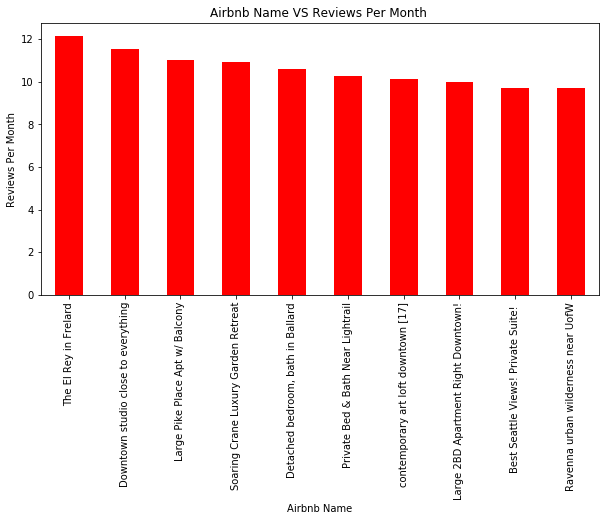

In [106]:
# function for setting the tittle, x and y label name and show the plot 
def plotDiagram(title,x,y):
    '''
    input:  
        title: title of a diagram 
        x: x label name of a diagram
        y: y label name of a diagram
    output:
        plot show: displaying a plot with a specific title, x and y
    '''
    plot.set_title(title)
    plot.set_xlabel(x)
    plot.set_ylabel(y)
    plt.show()

plot = listings10['reviews_per_month'].plot(kind = 'bar',figsize=(10,5),color='red')
plot.set_xticklabels(listings10['name'])
plotDiagram('Airbnb Name VS Reviews Per Month ','Airbnb Name','Reviews Per Month')

# Q2 What is the top 5 listing id that got the highest number of reviews?

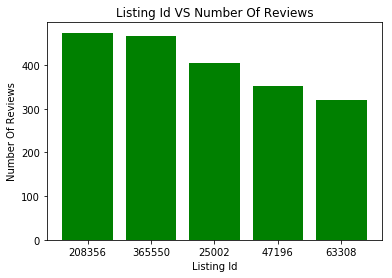

In [107]:
# dictionary is used for counting the top 5 
listingsCount=list(reviews['listing_id'])
listingsMost=dict(Counter(listingsCount).most_common(5))
plt.bar(range(len(listingsMost)), listingsMost.values(),color='g')
plt.xticks(range(len(listingsMost)), list(listingsMost.keys()))
plt.xlabel('Listing Id')
plt.ylabel('Number Of Reviews')
plt.title('Listing Id VS Number Of Reviews')
plt.show()


# Q3 What is the months that airbnb homes rents most? 

In [108]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0


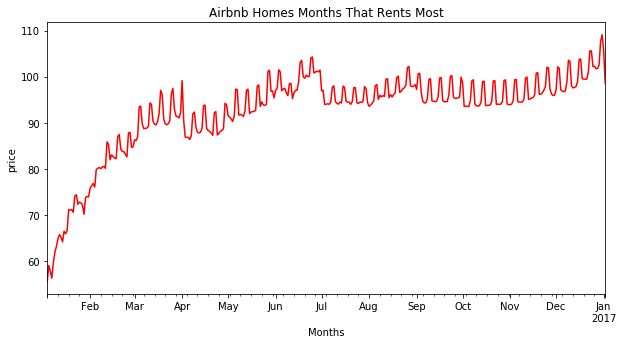

In [109]:
# grouping the two columns and do mean on them
plot = calendar.groupby(['date'])['price'].mean().plot(figsize=(10,5),color='red')
plotDiagram('Airbnb Homes Months That Rents Most','Months','price')

# Q4 what is the most years and months that hosts joined at? 

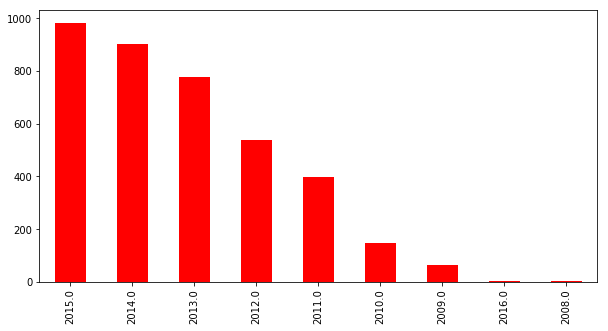

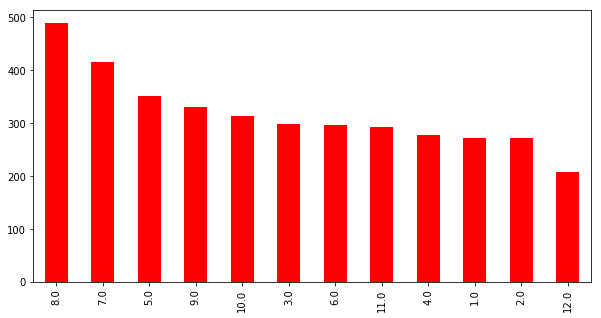

In [110]:
# retrieve the month and year of the dates
listings['year'], listings['month']  = listings['host_since'].dt.year, listings['host_since'].dt.month
# grouping the two columns and counts them
yearHostJoin = listings['year'].value_counts().plot(kind='bar',figsize=(10,5),color='red')
plotDiagram('Years Hosts Most Joined','Years','Count')
# grouping the two columns and counts them
monthHostJoin = listings['month'].value_counts().plot(kind='bar',figsize=(10,5),color='red')
plotDiagram('Months Hosts Most Joined','Months','Count')

# Results evaluation

In conclusion the Seattle Airbnb dataset has alot of information like reviews of listings, data of hosts joined and others also, the three dataset which are calender, reviews and listings needs cleaning in many ways like missing data that i tried to clean and through the analysis it came to my mind four question that it was answered with visualization.